In [1]:
%run ../preprocessing/Artifact_Removal/Extract_Describer_Events.ipynb
%run ../preprocessing/Artifact_Removal/preprocecssing_helpers.ipynb
%run ../preprocessing/Artifact_Removal/Batch_ArtifactFilter_Epoch.ipynb
%run ../preprocessing/StimCodes.ipynb
%run ../Classification/ConcatEpochTrails.ipynb

ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.
ERROR:root:File `'Batch_ArtifactFilter_Epoch.ipynb.py'` not found.
ERROR:root:File `'preprocecssing_helpers.ipynb.py'` not found.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler
from mne.decoding import SPoC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split as tts
import mne
from sklearn.model_selection import StratifiedKFold
from mne.datasets import sample
from mne.decoding import (SlidingEstimator, GeneralizingEstimator,
                          cross_val_multiscore, LinearModel, get_coef)
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE 
import os
from mne.decoding import UnsupervisedSpatialFilter
import os.path as op
from os import listdir
from os.path import isfile, join
from collections import defaultdict
from scipy.stats import skew, kurtosis
import mne 

from mne.decoding import Vectorizer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa

from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.metrics import confusion_matrix
from mne.viz import tight_layout

import time
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from urllib.request import urlopen

plt.style.use('ggplot')
pd.set_option('display.max_columns', 500)

In [18]:
epoch=mne.read_epochs('D:\\USB Drive\\NewEEG-200s\\New\\20131216_1441_epo.fif')

Reading D:\USB Drive\NewEEG-200s\New\20131216_1441_epo.fif ...
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
1753 matching events found
Applying baseline correction (mode: mean)
1753 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [19]:
modality_lexicality_event_ids

{'AALL': 112,
 'AALN': 212,
 'AANL': 312,
 'AANN': 412,
 'AVLL': 512,
 'AVNN': 612,
 'VALL': 712,
 'VANN': 812,
 'VVLL': 912,
 'VVLN': 1012,
 'VVNL': 1112,
 'VVNN': 1212}

In [20]:
new_event_ids = convert_epoch_events_to_stim_combinations(epoch)

Error with stim-code: [ 4 13]


In [21]:
epoch.events = new_event_ids

In [22]:
language = [112, 312, 512, 712, 912, 1112]
non_language = [212, 412, 612, 812, 1012, 1212]

labels = [0 if (x in language) else 1 for x in epoch.events[:,-1]]

In [23]:
labels_np = np.array(labels)

In [24]:
labels_np.shape

(1749,)

In [25]:
if 'Nasium' in epoch.ch_names:
    epoch.drop_channels(ch_names=['Nasium', 'LL4', 'L12', 'VEOG','STI 014']);

In [28]:
X = epoch.get_data()[0:1749]
y = labels_np
print(X.shape,epoch.get_data().shape)
vec=Vectorizer()
X=vec.fit_transform(X)
X.shape

(1749, 124, 257) (1753, 124, 257)


(1749, 31868)

In [29]:
from sklearn import metrics

clf = RandomForestRegressor(n_estimators =10, random_state = 42)
    
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)
    
clf.fit(X_train, y_train)
    
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred.round()))

Accuracy: 0.547945205479452


In [30]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances),257):
    channel.append(np.sum(importances[i:i+257]))
    channel1=np.array(channel)
    channel1.shape

In [44]:
import pandas as pd
feature_imp = pd.Series(channel1,index=epoch.ch_names).sort_values(ascending=False)
feature_imp[:]

Lm      0.061449
LE3     0.040409
RE3     0.026154
RC4     0.022314
RD4     0.019619
LL10    0.019488
L14     0.019220
RR1     0.017287
L10     0.015216
RE4     0.013648
LD4     0.013294
LA1     0.012876
LA2     0.012842
RC3     0.012730
LL9     0.012560
RR2     0.012041
LD3     0.012000
RA3     0.011902
LB1     0.011832
L7      0.011720
RC7     0.011575
RR13    0.011042
RC1     0.010882
LB4     0.010823
RR4     0.010641
Z5      0.010521
RA5     0.010506
LB5     0.010499
RR12    0.010400
R2      0.010381
          ...   
L5      0.003902
L4      0.003781
RR3     0.003779
RE1     0.003603
LL12    0.003450
RD1     0.003444
LL7     0.003429
Z6      0.003328
LL6     0.003322
Z3      0.003286
LL13    0.003280
RC2     0.003093
RB2     0.003019
RC6     0.002855
Z7      0.002767
LE4     0.002762
R9      0.002541
R4      0.002458
RR8     0.002209
LL3     0.002126
L1      0.002045
LL2     0.001787
L8      0.001686
LB2     0.001663
RB3     0.001131
R6      0.000861
RR7     0.000828
L3      0.0000

In [47]:
name=['Lm','LE3','RE3','RC4','RD4','LL10','L14','RR1','L10','RE4','LD4','LA1','LA2','RC3','LL9','RR2']

In [48]:
montage = mne.channels.read_montage('ANT_DukeWaveGuard_128_electrode_montages_updated_V4') 

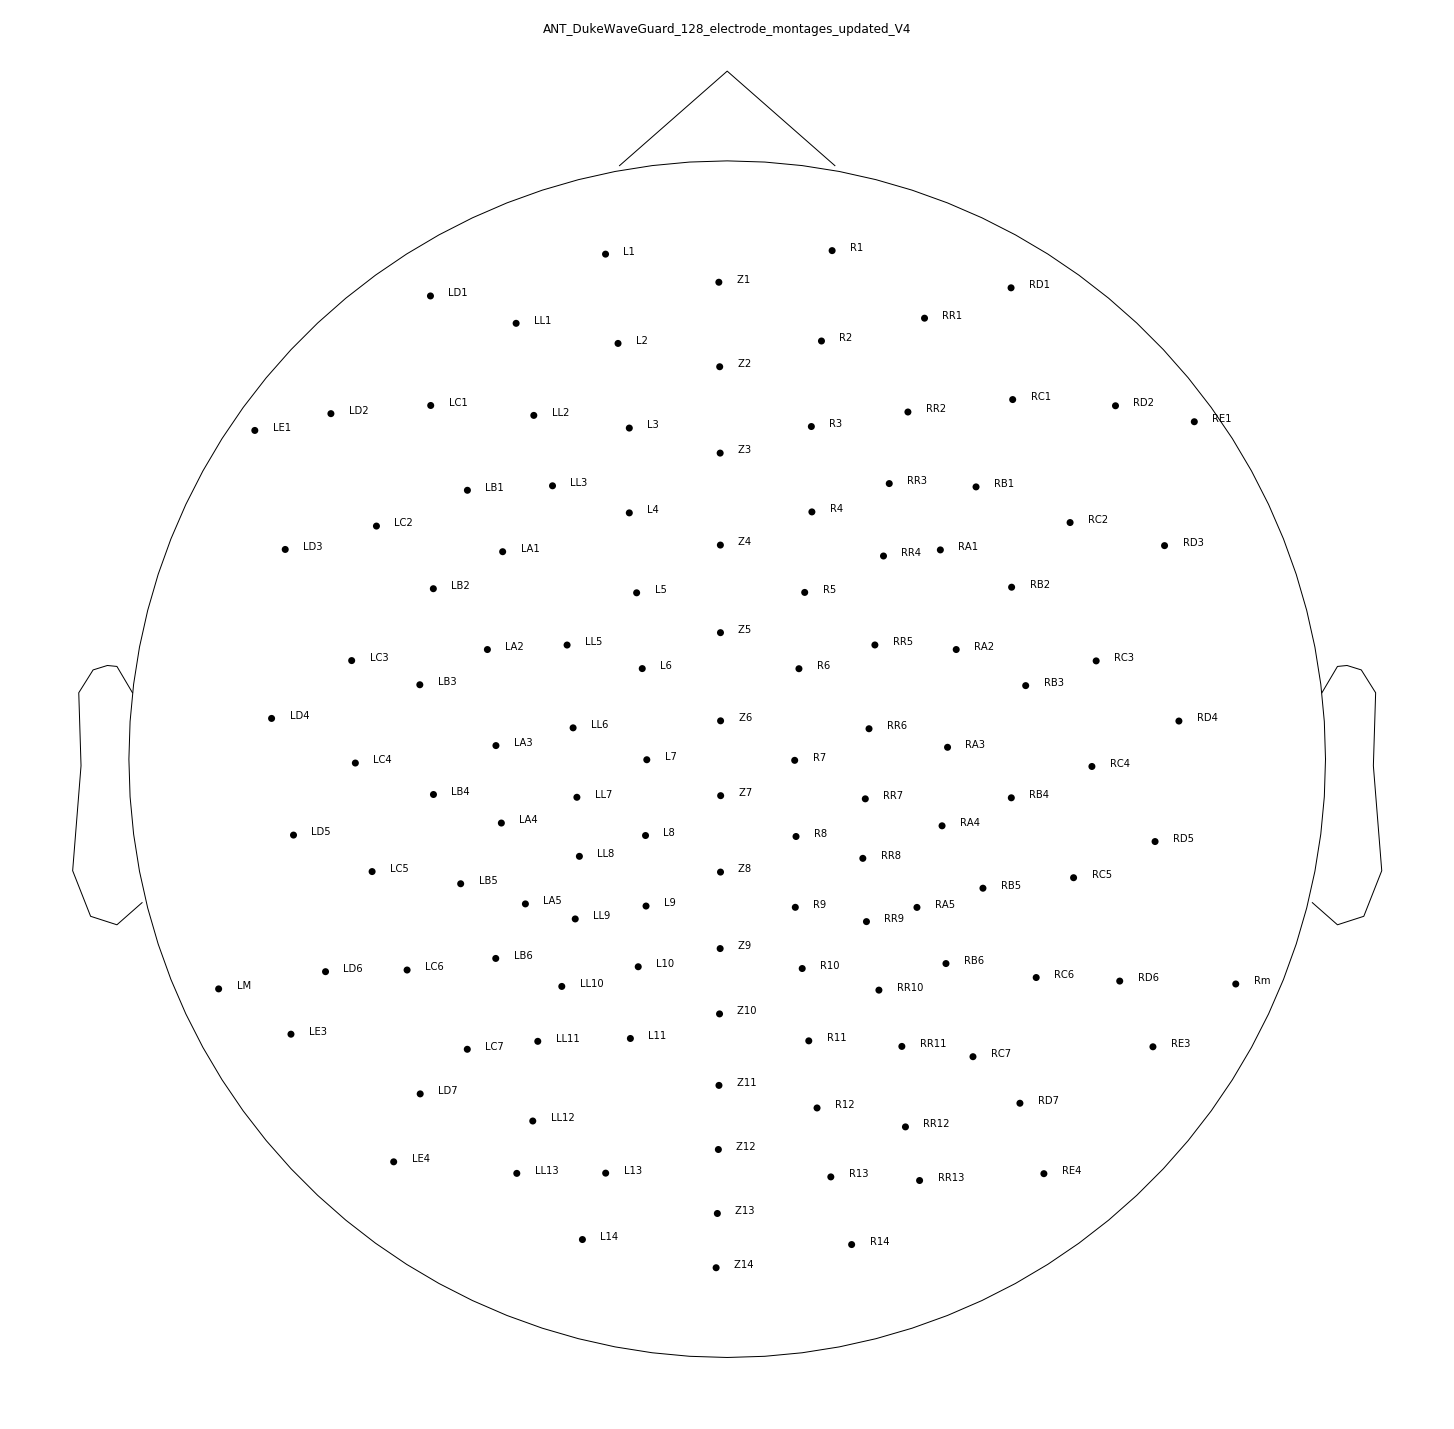

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 15
montage.plot(); 

matplotlib.rcParams.update({'font.size': 18})

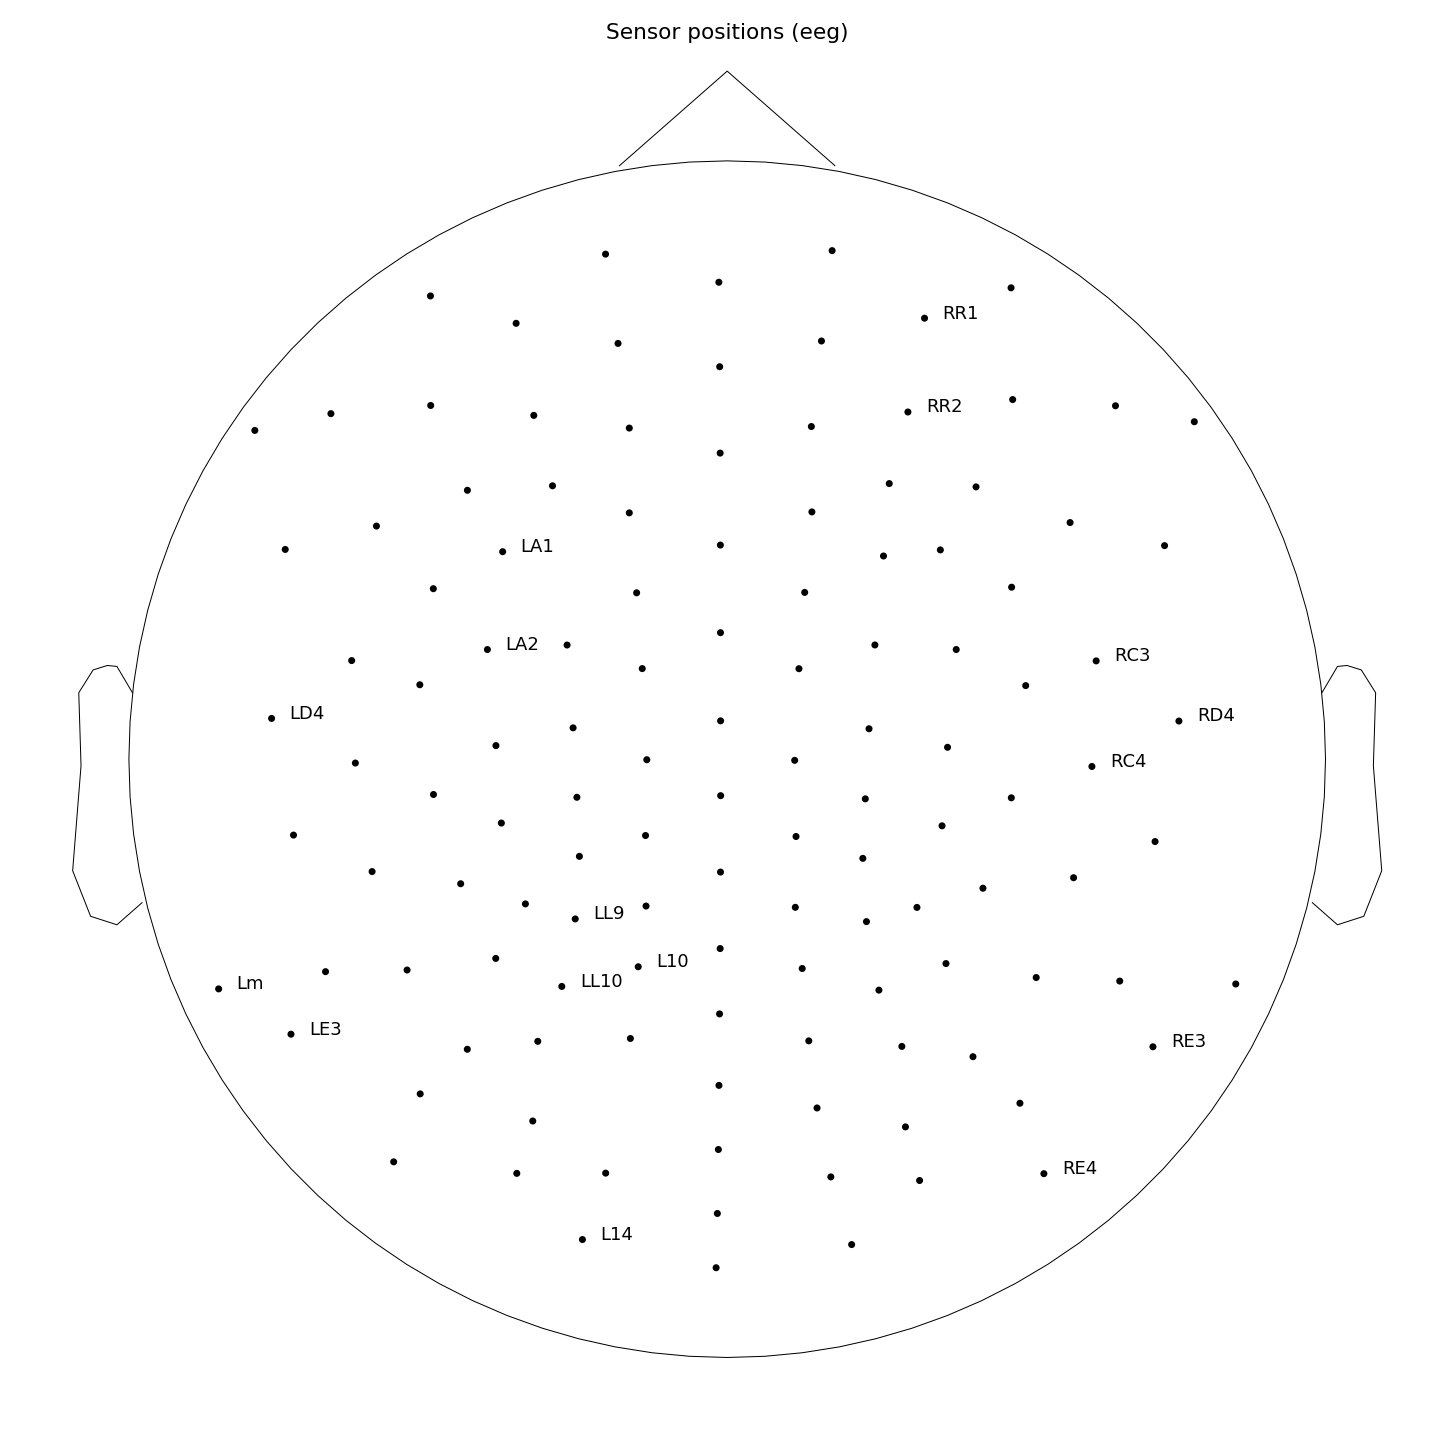

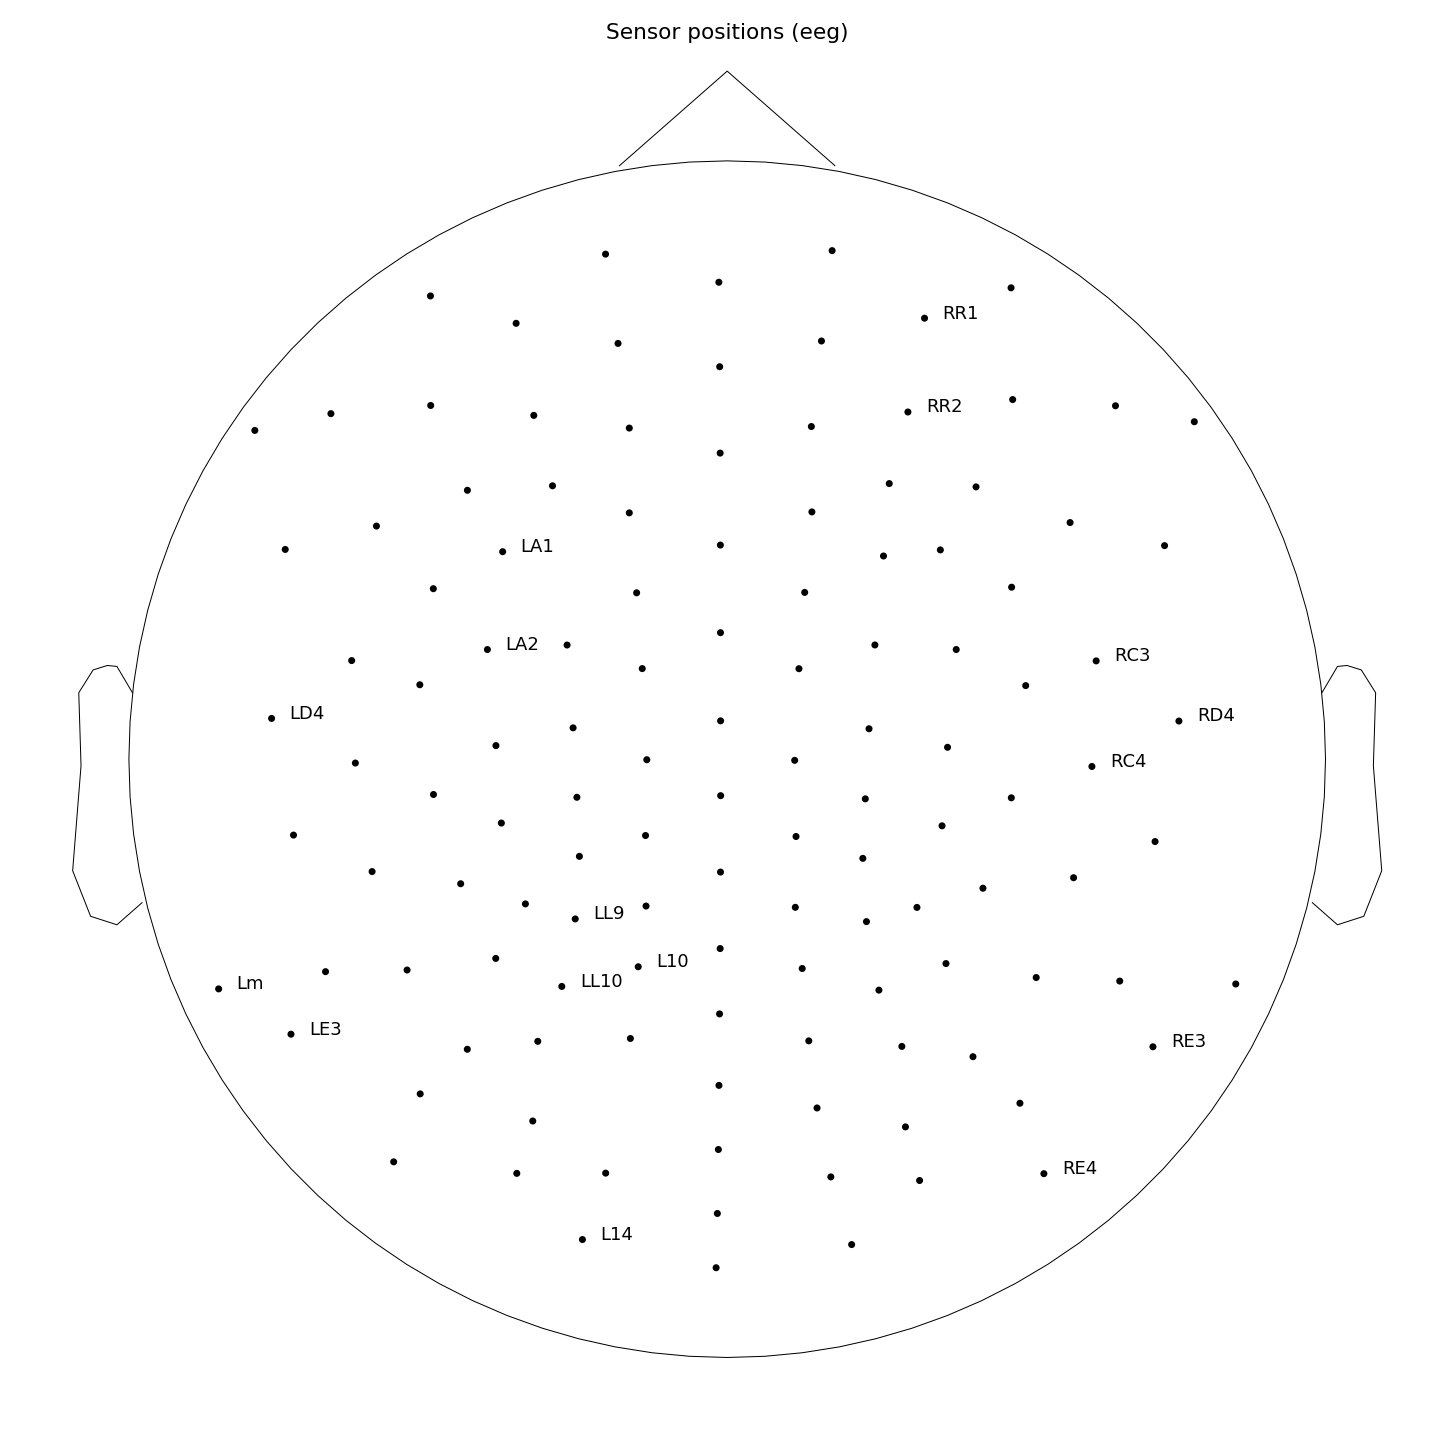

In [50]:
epoch.set_montage(montage)  
epoch.plot_sensors(show_names=name)

In [51]:
channel=[]
importances = np.array(clf.feature_importances_)
for i in range(0,len(importances)):
    if i%257 != 0:
        n_sample.append(importances[i])
    else:
        n_sample=[]
        n_sample.append(importances[i])
        channel.append(n_sample)
channel=np.array(channel)
print(channel.shape,importances.shape)

(124, 257) (31868,)


In [67]:
evoked = mne.EvokedArray(channel, epoch.info, tmin=epoch.times[0])
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0., .500, .100), title='patterns',
                  **joint_kwargs)

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 576x302.4 with 9 Axes>

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 576x302.4 with 9 Axes>

Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
Estimating covariance using LEDOIT_WOLF
Done.
-0.10750226255873156
Estimating covariance using LEDOIT_WOLF
Done.
Estimating co

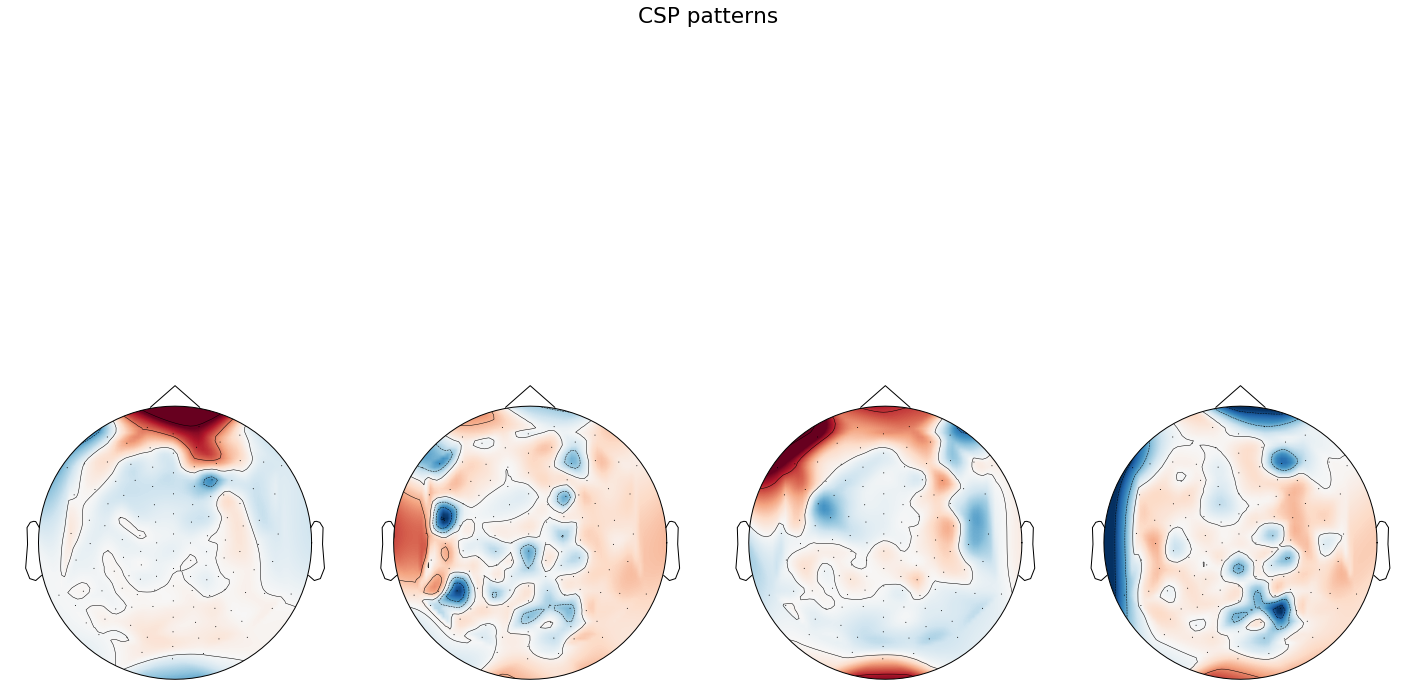

In [70]:
# Or use much more convenient scikit-learn cross_val_score function using
# a Pipeline
from sklearn.svm import SVC  # noqa
from sklearn.model_selection import ShuffleSplit  # noqa
from mne.decoding import CSP  # noqa
from sklearn.pipeline import Pipeline  # noqa
from sklearn.model_selection import cross_val_score  # noqa
n_components = 3  # pick some components
svc = RandomForestRegressor(n_estimators =110, random_state = 42)
csp = CSP(n_components=n_components, norm_trace=False)

# And using reuglarized csp with Ledoit-Wolf estimator
csp = CSP(n_components=n_components, reg='ledoit_wolf', norm_trace=False)
clf = Pipeline([('CSP', csp), ('SVC', svc)])
scores = cross_val_score(clf, epoch.get_data()[0:1749], labels_np, cv=cv, n_jobs=1)
print(scores.mean())  # should get better results than above

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epoch.get_data()[0:1749], labels_np)
data = csp.patterns_
fig, axes = plt.subplots(1, 4)
for idx in range(4):
    mne.viz.plot_topomap(data[idx], evoked.info, axes=axes[idx], show=False)
fig.suptitle('CSP patterns')
fig.tight_layout()
mne.viz.utils.plt_show()

In [61]:
import mne
from mne import io, EvokedArray

time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning


<ipython-input-69-093e1d14875a>:2: DeprecationWarning: time_unit defaults to "ms" in 0.16 but will change to "s" in 0.17, set it explicitly to avoid this warning
  evoked.plot_topomap(title='EEG %s')


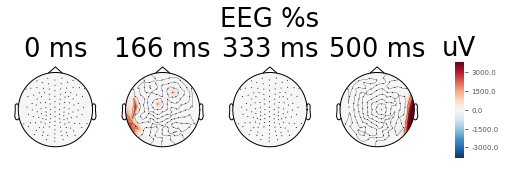

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 576x302.4 with 9 Axes>

TypeError: get_tightbbox() got an unexpected keyword argument 'bbox_extra_artists'

<Figure size 576x302.4 with 9 Axes>

In [69]:
evoked = mne.EvokedArray(channel, epoch.info, tmin=epoch.times[0])
evoked.plot_topomap(title='EEG %s')
joint_kwargs = dict(ts_args=dict(time_unit='s'),
                    topomap_args=dict(time_unit='s'))
evoked.plot_joint(times=np.arange(0., .500, .100), title='patterns',
                  **joint_kwargs)